# **PROJECT OBJECTIVE**

Customer Personality Analysis 

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

DATASET DETAILS

People

•	**ID:** Customer's unique identifier

•	**Year_Birth:** Customer's birth year

•	**Education:** Customer's education level

•	**Marital_Status:** Customer's marital status

•	**Income:** Customer's yearly household income

•	**Kidhome:** Number of children in customer's household

•	**Teenhome:** Number of teenagers in customer's household

•	**Dt_Customer:** Date of customer's enrollment with the company

•	**Recency:** Number of days since customer's last purchase

•	**Complain:** 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

•	**MntWines:** Amount spent on wine in last 2 years

•	**MntFruits:** Amount spent on fruits in last 2 years

•	**MntMeatProducts:** Amount spent on meat in last 2 years

•	**MntFishProducts:** Amount spent on fish in last 2 years

•	**MntSweetProducts:** Amount spent on sweets in last 2 year
s
•	**MntGoldProds:** Amount spent on gold in last 2 years
Promotion
•	NumDealsPurchases: Number of purchases made with a discount

•	**AcceptedCmp1:** 1 if customer accepted the offer in the 1st campaign, 0 otherwise

•	**AcceptedCmp2:** 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

•	**AcceptedCmp3:** 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

•	**AcceptedCmp4:** 1 if customer accepted the offer in the 4th campaign, 0 otherwise

•	**AcceptedCmp5:** 1 if customer accepted the offer in the 5th campaign, 0 otherwise

•	**Response:** 1 if customer accepted the offer in the last campaign, 0 otherwise

Place
•	**NumWebPurchases:** Number of purchases made through the company’s website

•	**NumCatalogPurchases:** Number of purchases made using a 

•	**NumStorePurchases:** Number of purchases made directly in stores

•	**NumWebVisitsMonth:** Number of visits to company’s website in the last month


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import davies_bouldin_score, silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded=files.upload()

Saving marketing_campaign1.xlsx to marketing_campaign1.xlsx


In [3]:
df=pd.read_excel("marketing_campaign1.xlsx")

In [4]:
df.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
576,8159,1968,Graduation,Married,51287.0,1,1,2014-04-01,10,117,...,7,0,0,0,0,0,0,3,11,0
662,5084,1975,Graduation,Widow,58330.0,0,1,2013-12-25,87,445,...,4,0,0,0,0,0,0,3,11,0
1265,3910,1975,Graduation,Divorced,83829.0,0,0,2013-10-08,78,897,...,1,1,0,1,1,0,0,3,11,1
1785,9648,1967,Graduation,Single,46904.0,1,1,2012-11-03,20,153,...,8,0,0,0,0,0,0,3,11,0
1837,332,1957,Graduation,Married,47743.0,0,1,2013-03-22,56,198,...,6,0,1,0,0,0,0,3,11,0
781,10839,1976,Graduation,Together,36283.0,1,1,2014-04-14,42,6,...,4,0,0,0,0,0,0,3,11,0
1440,5967,1952,Graduation,Together,33402.0,1,1,2013-07-18,60,26,...,8,0,0,0,0,0,0,3,11,0
358,6142,1943,Master,Married,65073.0,0,0,2013-08-20,65,629,...,2,0,0,0,0,0,1,3,11,0
444,2106,1974,2n Cycle,Married,20130.0,0,0,2014-03-17,99,0,...,8,0,0,0,0,0,0,3,11,0
1250,9606,1965,PhD,Married,69969.0,0,0,2013-08-27,64,882,...,3,0,0,1,1,0,0,3,11,1


In [5]:
df.shape

(2240, 29)

In [6]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [8]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
df.shape

(2240, 29)

In [10]:
#Checking for duplicate records.
df.duplicated().sum()

0

Feature Engineering¶

In [11]:
#Adding age column
df["Age"] = 2023 - df["Year_Birth"]

In [12]:
df["Education"].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [13]:
df["Marital_Status"].value_counts(normalize=True)

Married     0.385714
Together    0.258929
Single      0.214286
Divorced    0.103571
Widow       0.034375
Alone       0.001339
Absurd      0.000893
YOLO        0.000893
Name: Marital_Status, dtype: float64

In [14]:
df["Z_CostContact"].value_counts()

3    2240
Name: Z_CostContact, dtype: int64

In [15]:
df["Z_Revenue"].value_counts()

11    2240
Name: Z_Revenue, dtype: int64

In [16]:
#Dropping the column which are not required.
df=df.drop(["Z_CostContact","Z_Revenue","Year_Birth","ID","Dt_Customer"],axis=1)

In [17]:
# simplifying Education field.
df["Education"] = df["Education"].replace({"Graduation":"Graduate","PhD":"Post-Graduate","Master":"Post-Graduate","2n Cycle":"Graduate","Basic":"Under Graduate",})

In [18]:
# simplifying Marital Status field.
df["Marital_Status"] = df["Marital_Status"].replace({"Married": "Partner", "Together": "Partner", "Absurd": "Single", "Widow": "Single", "YOLO": "Single", "Divorced": "Single", "Single": "Single","Alone":"Single"})

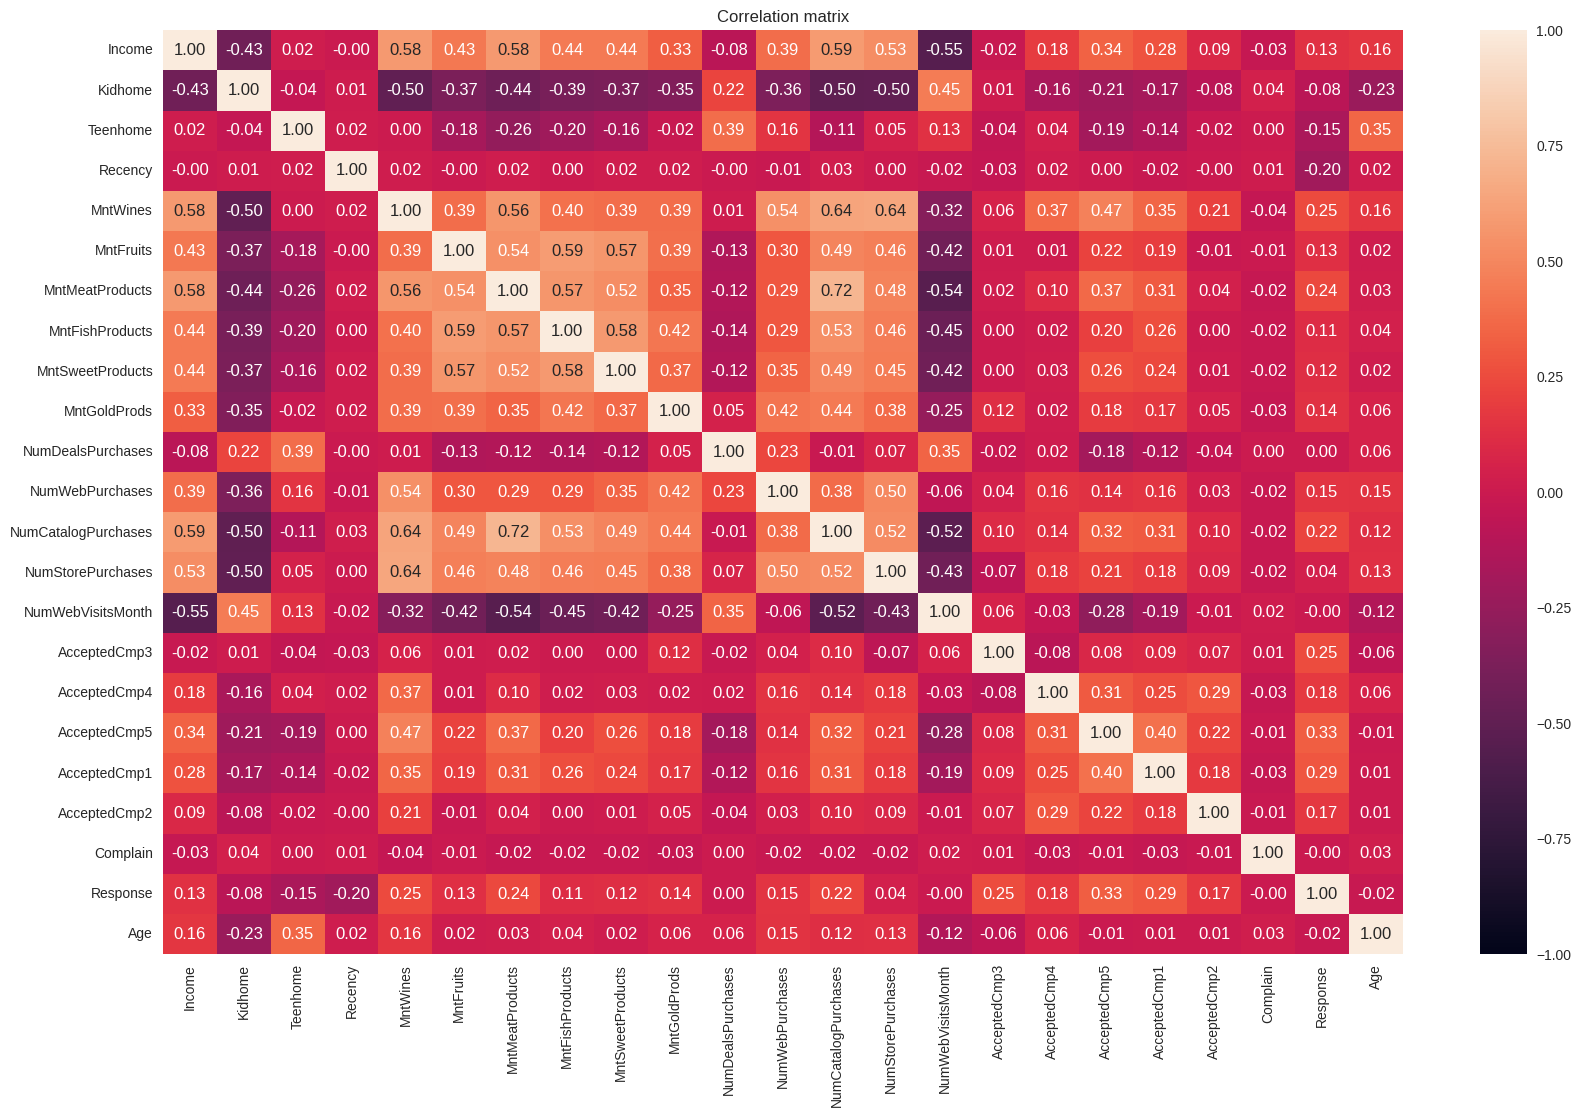

In [19]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True, annot_kws={"fontsize":12}, fmt=".2f", vmin=-1)
plt.title("Correlation matrix")
plt.show()

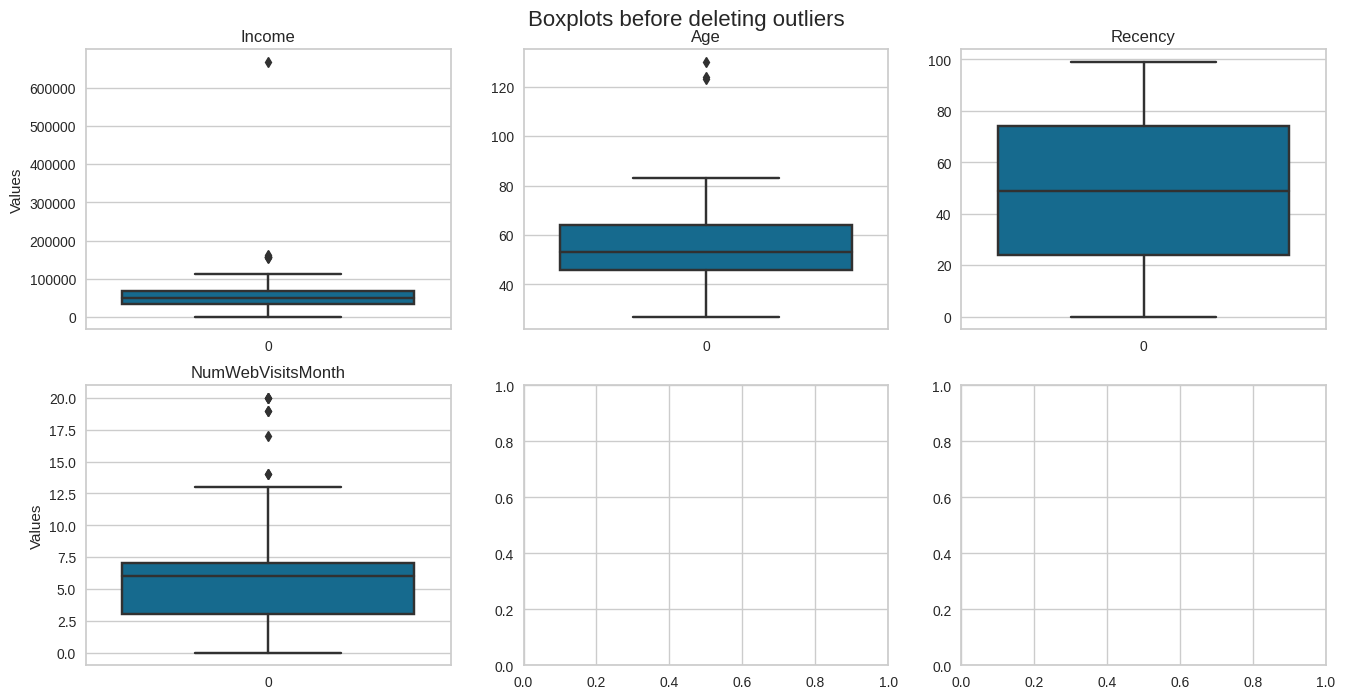

In [20]:
numeric_columns = ['Income',"Age", "Recency","NumWebVisitsMonth"]

def boxplots_custom(dataset, columns_list, rows, cols, suptitle,size=(16,8)):
    fig, axs = plt.subplots(rows, cols,  figsize=size)
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % cols == 0:
            axs[i].set_ylabel('Values')
        sns.boxplot( data=dataset[data], orient='v', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom(dataset=df, columns_list=numeric_columns, rows=2, cols=3, suptitle='Boxplots before deleting outliers')

#Income

In [21]:
fig_income = px.histogram(df, x="Income",range_x=[0,200000],title="Income Distribution")
fig_income.show()

Inference: We can see the outliers. Data is slightly skewed.

In [22]:
#Skewness of "Income" Disrribution 
print("Skewness: ",np.round(df["Income"].skew(),2))

Skewness:  6.76


In [23]:
#Deleting outliers from income column
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
outlier = df[(df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR))]
print("No. of outliers detected and deleted in income :", len(outlier))
df = df[~((df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR)))]

No. of outliers detected and deleted in income : 8


In [24]:
#Imputing mean to the income column
df['Income'].fillna(df["Income"].mean(),inplace=True)

Checking Age column

In [25]:
fig_income = px.histogram(df, x="Age",title="Age Distribution")
fig_income.show()

In [26]:
#Skewness of "Age" Disrribution 
print("Skewness: ",np.round(df["Age"].skew(),2))

Skewness:  0.35


In [27]:
#Deleting outliers from Age column
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
outlier = df[(df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR))]
print("No. of outliers detected and deleted in Age :", len(outlier))
df = df[~((df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR)))]

No. of outliers detected and deleted in Age : 3


In [28]:
# Creating bins of different age group
bin_edges = [25,40,60,100]
bin_labels = ["20-40", '40-60', '60+']
df['Age_group'] = pd.cut(df['Age'], bins=bin_edges, labels=bin_labels)
df.drop("Age",axis=1,inplace=True)

In [29]:
fig_mar = px.histogram(df, x='Age_group', nbins=4, title="Age group")
fig_mar.show()

In [30]:
fig_mar = px.histogram(df, x='Marital_Status', nbins=4, title="Marital Status Distribution")
fig_mar.show()

In [31]:
web=df["NumWebPurchases"].sum()
catalogue=df["NumCatalogPurchases"].sum()
store=df["NumStorePurchases"].sum()

In [32]:
values = [web,catalogue,store]  # values in percentage
labels=["web_Purchase","Catalogue_purchase","Store_Purchase"]
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

In [33]:
df["Complain"].value_counts()

0    2209
1      20
Name: Complain, dtype: int64

Since the no. of people with complain are nearly 1% of total data. Hence dropping the same.

In [34]:
df.drop("Complain", axis=1,inplace=True)

In [35]:
#Deleting outliers from Age column
Q1 = df["NumWebVisitsMonth"].quantile(0.25)
Q3 = df["NumWebVisitsMonth"].quantile(0.75)
IQR = Q3 - Q1
outlier = df[(df["NumWebVisitsMonth"] < (Q1 - 1.5 * IQR)) | (df["NumWebVisitsMonth"] > (Q3 + 1.5 * IQR))]
print("No. of outliers detected and deleted in Age :", len(outlier))
df = df[~((df["NumWebVisitsMonth"] < (Q1 - 1.5 * IQR)) | (df["NumWebVisitsMonth"] > (Q3 + 1.5 * IQR)))]

No. of outliers detected and deleted in Age : 8


### Plots to understand response rate of customers based other factors

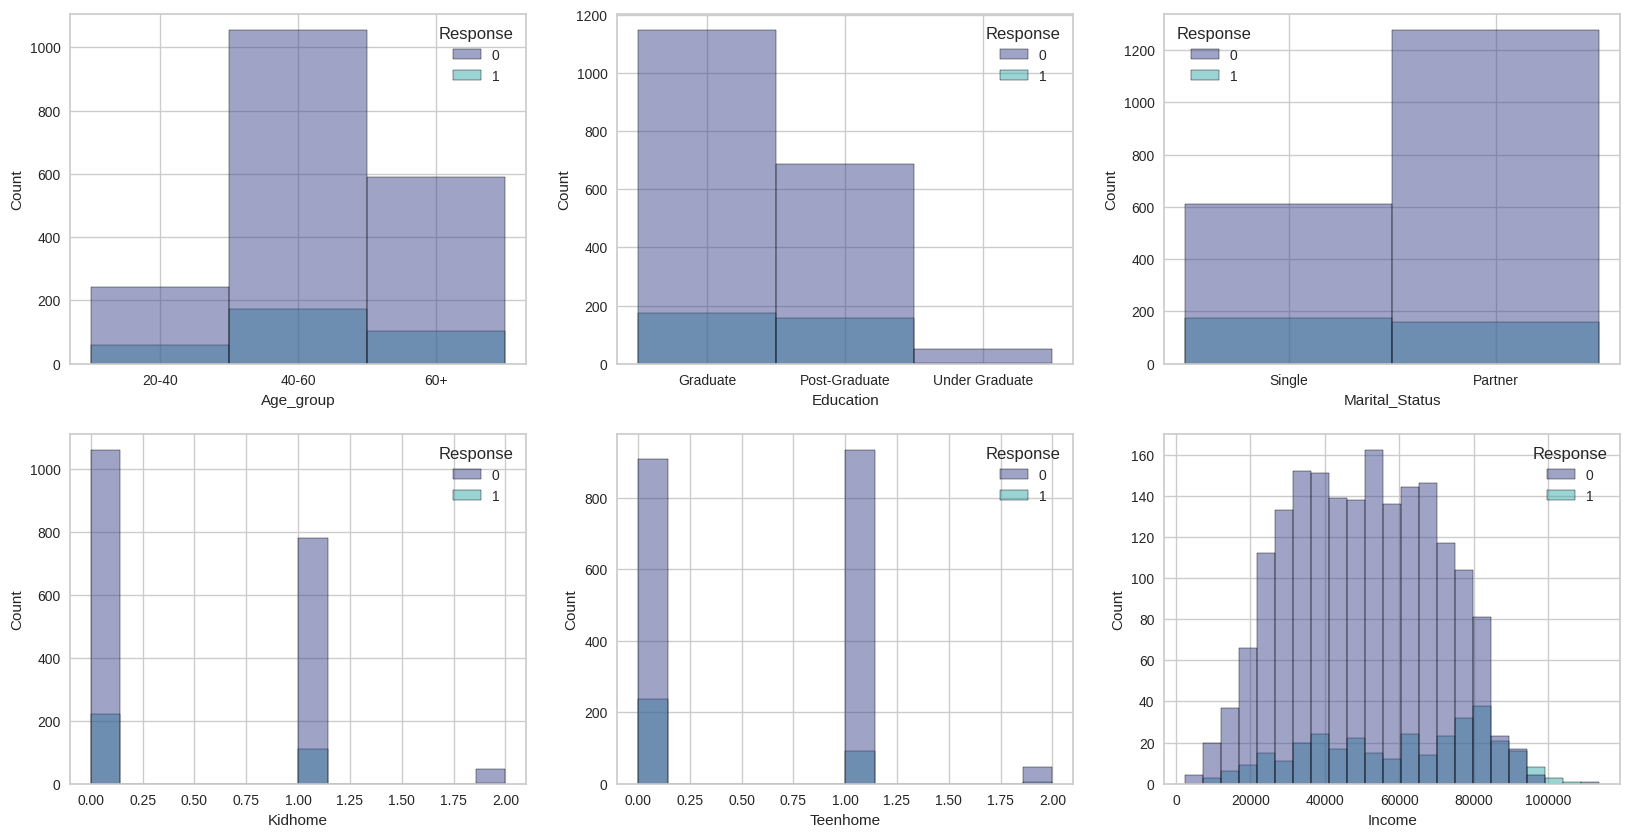

In [36]:
# Plotting "Response" with other fields
column_df=df[["Age_group","Education","Marital_Status","Kidhome","Teenhome","Income","Response"]]
plt.figure(figsize=(20, 10));
ax1 = plt.subplot(2,3,1);
ax2 = plt.subplot(2,3,2);
ax3 = plt.subplot(2,3,3);
ax4 = plt.subplot(2,3,4);
ax5 = plt.subplot(2,3,5); 
ax6 = plt.subplot(2,3,6);
axes = [ax1,ax2,ax3,ax4,ax5,ax6]
cols = column_df.columns
a = 0

for i in cols[0:6]:
  sns.histplot(data = column_df, x = i, hue = 'Response', ax = axes[a], 
               palette = 'mako')
  a= a+1

Insight:
Graduate people has a higher acceptance rate of offer.
Acceptance rate of People with higher income is more

###Plots to understand the spending pattern of customers

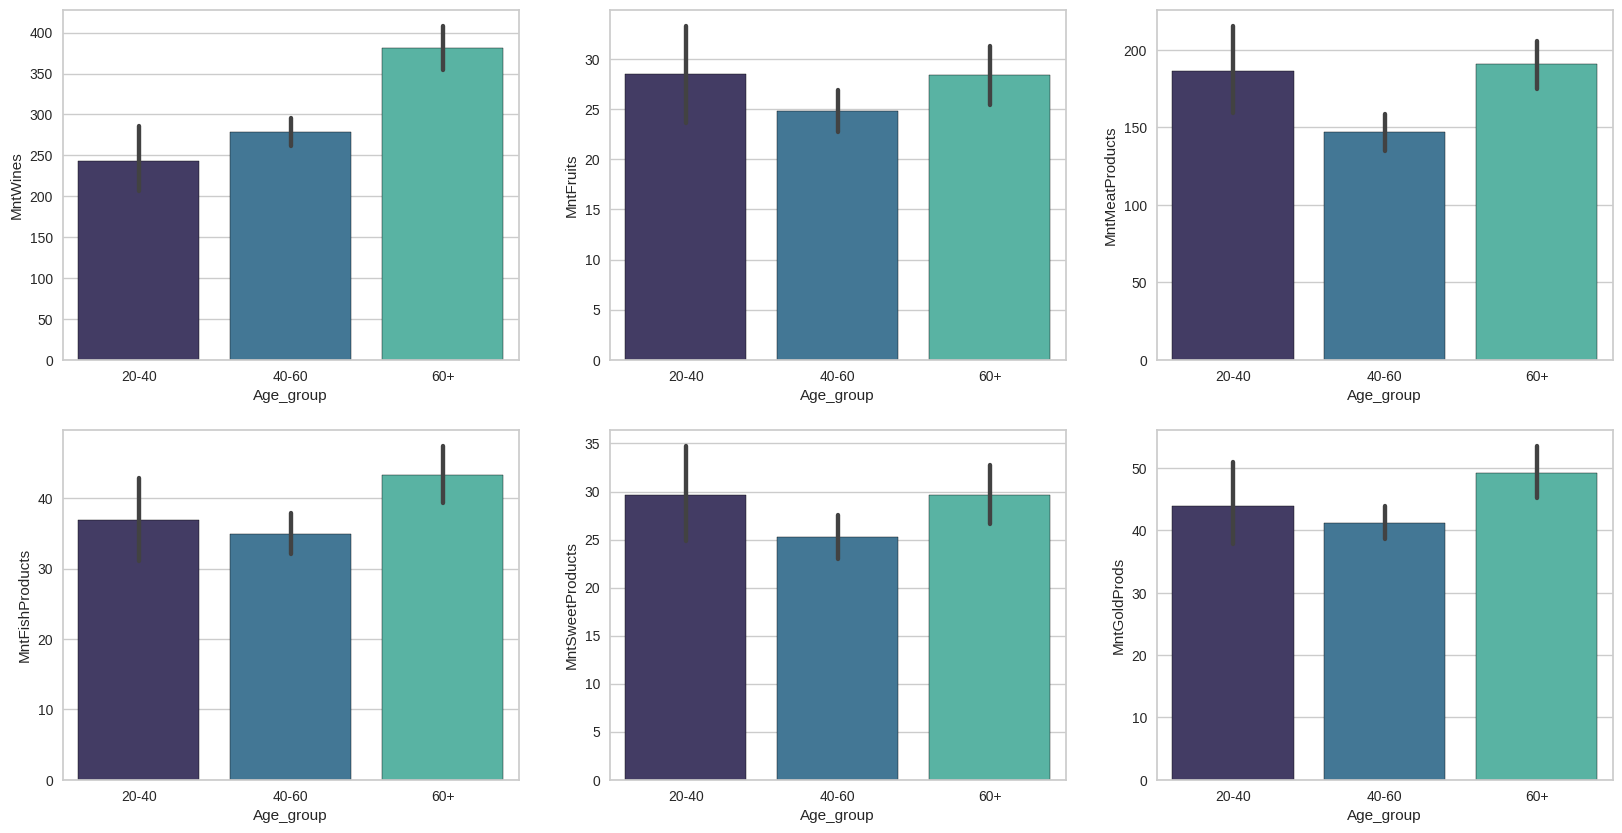

In [37]:
column_df2=df[["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds","Age_group"]]
plt.figure(figsize=(20, 10));
ax1 = plt.subplot(2,3,1);
ax2 = plt.subplot(2,3,2);
ax3 = plt.subplot(2,3,3);
ax4 = plt.subplot(2,3,4);
ax5 = plt.subplot(2,3,5); 
ax6 = plt.subplot(2,3,6);
axes = [ax1,ax2,ax3,ax4,ax5,ax6]
cols = column_df2.columns
a = 0

for i in cols[0:6]:
  sns.barplot(data = column_df2, x = "Age_group",y=i, ax = axes[a], 
               palette = 'mako',edgecolor='black')
  a= a+1

From the plot it is evident that the spending pattern is similar in amount spent on wines,meat,fish,sweet,fruit and gold. people aged between 25-35 i.e young people spend the most. Hence we can add all the column to arrive at total amount spent and drop the individual features.

In [38]:
df["Total_amt_spent"]=df["MntWines"]+df["MntFruits"]+df["MntMeatProducts"]+df["MntFishProducts"]+df["MntSweetProducts"]+df["MntGoldProds"]
df.drop(["MntWines","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds","MntFruits"],axis=1,inplace=True)

<Axes: xlabel='Total_amt_spent'>

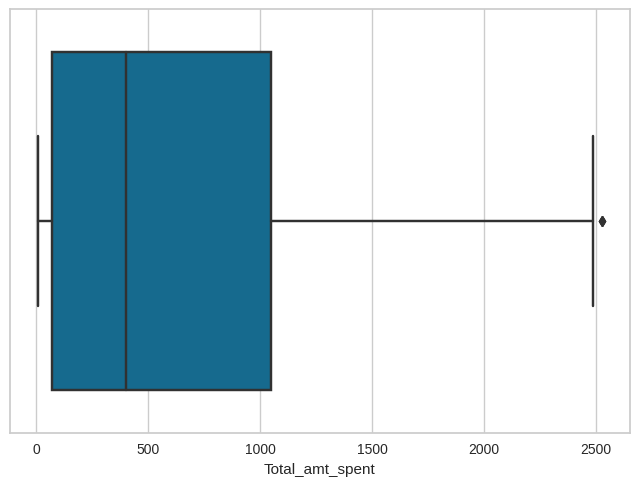

In [39]:
sns.boxplot(data=df,x="Total_amt_spent")

In [40]:
#Dropping outliers in from total spent
Q1 = df["Total_amt_spent"].quantile(0.25)
Q3 = df["Total_amt_spent"].quantile(0.75)
IQR = Q3 - Q1
outlier = df[(df["Total_amt_spent"] < (Q1 - 1.5 * IQR)) | (df["Total_amt_spent"] > (Q3 + 1.5 * IQR))]
print("No. of outliers detected and deleted in income :", len(outlier))
df = df[~((df["Total_amt_spent"] < (Q1 - 1.5 * IQR)) | (df["Total_amt_spent"] > (Q3 + 1.5 * IQR)))]

No. of outliers detected and deleted in income : 3


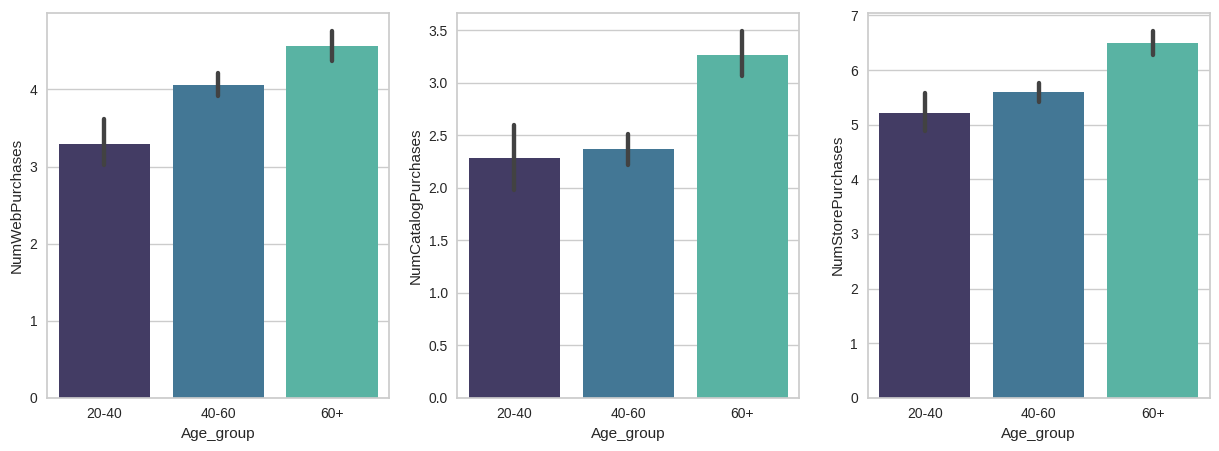

In [41]:
# Underastanding the type of purchase made
type_of_shop=["NumWebPurchases","NumCatalogPurchases","NumStorePurchases"]
plt.figure(figsize=(15,5));
ax1 = plt.subplot(1,3,1);
ax2 = plt.subplot(1,3,2);
ax3 = plt.subplot(1,3,3);
axes = [ax1,ax2,ax3]
cols = column_df2.columns
a=0
for i in type_of_shop:
  sns.barplot(df, x = "Age_group",y=i,ax = axes[a], palette = 'mako')
  a=a+1

Customers aged 50-65 are more highest web purchasers

In [42]:
df['AcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']
df.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'],axis=1,inplace=True)

In [43]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Age_group', 'Total_amt_spent', 'AcceptedCmp'],
      dtype='object')

In [44]:
df.shape

(2218, 15)

In [45]:
df_cluster=df.copy()
df_cluster2=df.copy()

In [46]:
df_cluster.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Age_group,Total_amt_spent,AcceptedCmp
0,Graduate,Single,58138.0,0,0,58,3,8,10,4,7,1,60+,1617,0
1,Graduate,Single,46344.0,1,1,38,2,1,1,2,5,0,60+,27,0
2,Graduate,Partner,71613.0,0,0,26,1,8,2,10,4,0,40-60,776,0
3,Graduate,Partner,26646.0,1,0,26,2,2,0,4,6,0,20-40,53,0
4,Post-Graduate,Partner,58293.0,1,0,94,5,5,3,6,5,0,40-60,422,0


In [47]:
print("Percentage of records deleted while cleaning",np.round((2240-df.shape[0])/2240*100,2))

Percentage of records deleted while cleaning 0.98


In [48]:
#Converting categorical features into numerical features by using OHE
df=pd.get_dummies(df)

In [49]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Response', 'Total_amt_spent', 'AcceptedCmp',
       'Education_Graduate', 'Education_Post-Graduate',
       'Education_Under Graduate', 'Marital_Status_Partner',
       'Marital_Status_Single', 'Age_group_20-40', 'Age_group_40-60',
       'Age_group_60+'],
      dtype='object')

In [50]:
df.shape

(2218, 20)

Initially building model considering most important features and then comparing it with model comprising all features.

In [51]:
df1=df[['Income','Total_amt_spent', 'AcceptedCmp','Marital_Status_Single','Marital_Status_Partner','Age_group_20-40',
       'Age_group_40-60', 'Age_group_60+']]

In [52]:
#Standardization of the data
scaler = StandardScaler()
scaled_df1 = scaler.fit_transform(df1)

In [53]:
scaled_df1

array([[ 0.31355967,  1.69434911, -0.43888101, ..., -0.39320094,
        -1.11373428,  1.48343426],
       [-0.26430866, -0.96715435, -0.43888101, ..., -0.39320094,
        -1.11373428,  1.48343426],
       [ 0.97379164,  0.28659791, -0.43888101, ..., -0.39320094,
         0.89788024, -0.67411144],
       ...,
       [ 0.25687037,  1.06496213,  1.03602518, ..., -0.39320094,
         0.89788024, -0.67411144],
       [ 0.8577672 ,  0.39874931, -0.43888101, ..., -0.39320094,
        -1.11373428,  1.48343426],
       [ 0.0553955 , -0.72443863, -0.43888101, ..., -0.39320094,
        -1.11373428,  1.48343426]])

In [54]:
# Applying PCA
pca1 = PCA(n_components = 3)
pca_values1 = pca1.fit_transform(scaled_df1)

In [55]:
pca_values1

array([[ 2.10736667,  1.64873363, -0.78312323],
       [ 0.30575059,  2.02352935, -1.60272887],
       [-0.13564214, -1.19131698,  1.15268581],
       ...,
       [ 0.96081747,  1.55718167,  1.86838873],
       [ 1.1976246 , -1.15437638, -1.35046169],
       [ 0.1273518 , -0.92936454, -1.82792046]])

In [56]:
#Calculating cumulative variance
var1 = pca1.explained_variance_ratio_
var_Cum1 = np.cumsum(np.round(var1,decimals = 4)*100)
var_Cum1

array([28.52, 53.53, 74.27])

In [57]:
pca_values1 = pd.DataFrame(data = pca_values1, columns=['PC1', 'PC2', 'PC3'])


In [58]:
#Function to visualize the PCA points on 3 dimensions
def visualize_clustering(data, predictions=None, marker_size=3, title="Principal Components in 3-Dimensions"):
  if predictions is not None:
    data['preds'] = predictions
    fig = px.scatter_3d(data, x='PC1', y='PC2', z='PC3', color='preds',
                      color_discrete_sequence=px.colors.qualitative.Pastel, opacity=0.5)
  else:
    fig = px.scatter_3d(data, x='PC1', y='PC2', z='PC3',
                        color_discrete_sequence=px.colors.qualitative.Pastel, opacity=0.5)

  fig.update_traces(marker_size = marker_size)
  fig.update_layout(title_text=title, title_x=0.5)
  fig.show()

In [59]:
visualize_clustering(pca_values1)

In [60]:
#Used for evaluation
db1 = []
sil1 = []

K-Means

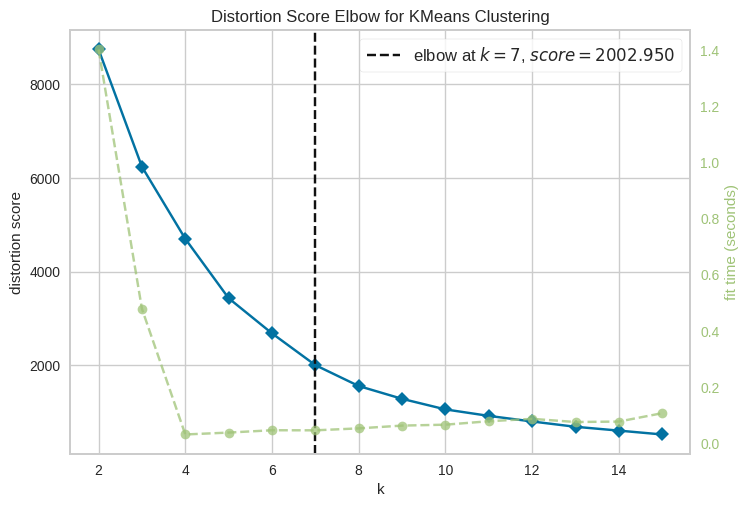

In [61]:
#Plotting Distortion score to find optimum value of K
visualizer = KElbowVisualizer(KMeans(), k=15);

visualizer.fit(pca_values1);
visualizer.show();

In [62]:
model_kmeans1 = KMeans(n_clusters=6, random_state=0, init='k-means++')
y_predict_kmeans1 = model_kmeans1.fit_predict(pca_values1)

In [63]:
visualize_clustering(pca_values1, model_kmeans1.labels_, title="KMeans Clustering K=6")

In [64]:
db1.append(davies_bouldin_score(pca_values1, model_kmeans1.labels_))
sil1.append(silhouette_score(pca_values1, model_kmeans1.labels_))

Applying DBSCAN

In [65]:
dbscan1 = DBSCAN(eps=2, min_samples=3)
dbscan1.fit_predict(pca_values1)

array([0, 0, 1, ..., 4, 5, 2])

In [66]:
cl1=pd.DataFrame(dbscan1.labels_,columns=['cluster'])
cl1

,cluster
0,0
1,0
2,1
3,2
4,3
...,...
2213,1
2214,5
2215,4
2216,5


In [67]:
cl1["cluster"].value_counts()

3    551
4    417
2    361
0    357
1    260
5    260
6     12
Name: cluster, dtype: int64

Since we have deleted all outliers, no noise detected in DBSCAN clustering

In [68]:
#Visualizing clusters formed in DBSCAN
visualize_clustering(pca_values1,dbscan1.labels_, title="DBSCAN")

In [69]:
db1.append(davies_bouldin_score(pca_values1, dbscan1.labels_))
sil1.append(silhouette_score(pca_values1,dbscan1.labels_))

Agglomerative clustering

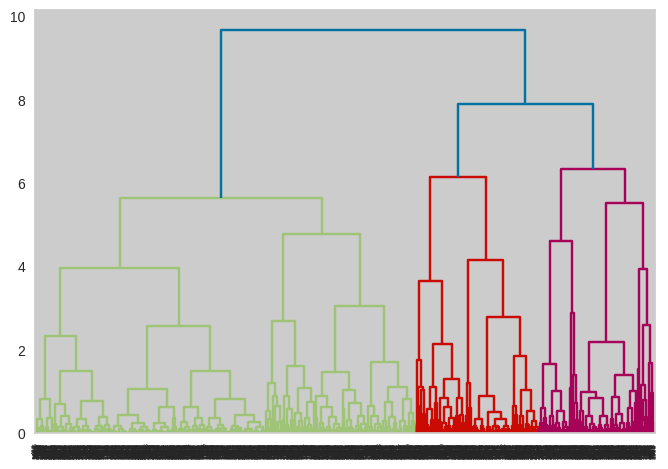

In [70]:
dendrogram1 = sch.dendrogram(sch.linkage(pca_values1, method='complete'))

In [71]:
hc1 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [72]:
y_hc1 = hc1.fit_predict(pca_values1)

In [73]:
df_agglo1=df1.copy()
df_agglo1['h_clusterid'] = y_hc1
df_agglo1['h_clusterid'].value_counts()

0    1364
2     272
3     260
4     178
1     144
Name: h_clusterid, dtype: int64

In [74]:
db1.append(davies_bouldin_score(pca_values1, hc1.labels_))
sil1.append(silhouette_score(pca_values1, hc1.labels_))

In [75]:
res1 = pd.DataFrame({'Davies Bouldin Index (Lower is better)': db1, 'Silhouette Index (Higher is better)': sil1}, index=['KMeans', 'DBSCAN', 'Agglomerative'])
res1.index.names = ['Algorithm']
res1

,Davies Bouldin Index (Lower is better),Silhouette Index (Higher is better)
Algorithm,,
KMeans,0.578061,0.661690
DBSCAN,0.483635,0.653040
Agglomerative,0.834243,0.317802


Here we can clearly see that K-Means is performing better than other 2 models

Cluster exploration

No. of customers in each cluster

In [76]:
df_cluster['Cluster']=model_kmeans1.labels_
df['Cluster']=model_kmeans1.labels_

In [77]:
#Writing clusters into a excel file 
with pd.ExcelWriter('my_excel_file.xlsx') as writer:
    df_cluster.to_excel(writer, sheet_name='Sheet1', index=False)

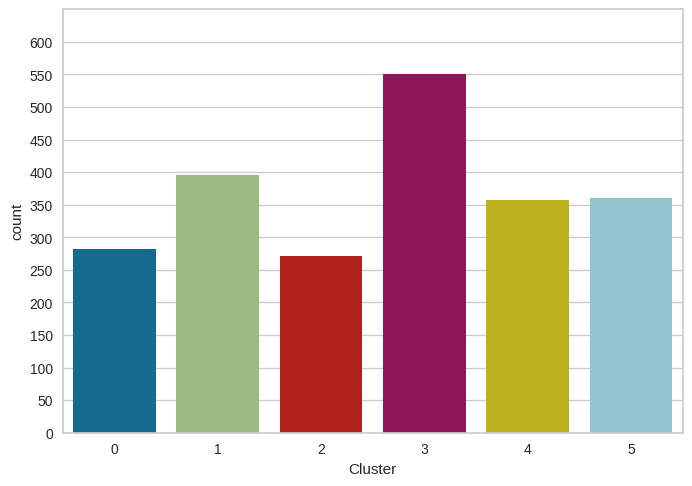

In [78]:
sns.countplot(data=df, x='Cluster');
plt.yticks(list(range(0,650, 50)));
plt.ylim([0,650]);

In [79]:
amount = df.groupby('Cluster').Income.mean()
fig = px.pie(values=np.round(amount.values, 2), names=amount.index,  
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.data[0].textinfo = 'percent+value'
fig.update_layout(title_text='Average Income Per Group', title_x=0.5)

Cluster 4 has people with higher income whereas cluster 5 has people with lower income

In [80]:
pca_values1.drop('preds',axis=1,inplace=True)

In [81]:
pca_values1

,PC1,PC2,PC3
0,2.107367,1.648734,-0.783123
1,0.305751,2.023529,-1.602729
2,-0.135642,-1.191317,1.152686
3,-1.474042,-0.432292,-1.853976
4,-0.827564,-1.045161,0.846766
...,...,...,...
2213,0.108054,-1.238995,1.275623
2214,1.254126,-1.181684,-1.260476
2215,0.960817,1.557182,1.868389
2216,1.197625,-1.154376,-1.350462


In [82]:
df_cluster2["clusters"]=model_kmeans1.labels_

Now building model with 4 no's of clusters

In [83]:
model_kmeans2 = KMeans(n_clusters=4, random_state=0, init='k-means++')
y_predict_kmeans2 = model_kmeans2.fit(df1)

In [84]:
df_cluster2["clusters"]=model_kmeans1.labels_
df_cluster2["clusters"]=model_kmeans2.labels_

In [85]:
print(model_kmeans2.labels_)

[2 1 0 ... 2 0 2]


In [86]:
check=pd.DataFrame(model_kmeans2.labels_)
check

,0
0,2
1,1
2,0
3,3
4,2
...,...
2213,2
2214,2
2215,2
2216,0


In [87]:
model_kmeans2.cluster_centers_

array([[7.86270620e+04, 1.36199812e+03, 7.59398496e-01, 3.62781955e-01,
        6.37218045e-01, 1.39097744e-01, 4.73684211e-01, 3.87218045e-01],
       [4.08297484e+04, 2.02891234e+02, 1.29870130e-01, 3.71753247e-01,
        6.28246753e-01, 1.16883117e-01, 6.21753247e-01, 2.61363636e-01],
       [5.92731503e+04, 7.25705047e+02, 2.27129338e-01, 3.35962145e-01,
        6.64037855e-01, 5.52050473e-02, 5.31545741e-01, 4.13249211e-01],
       [2.33850573e+04, 7.28233945e+01, 7.33944954e-02, 3.46330275e-01,
        6.53669725e-01, 2.66055046e-01, 5.87155963e-01, 1.46788991e-01]])

In [88]:
centroid_df = pd.DataFrame(model_kmeans2.cluster_centers_, columns=['Income','Total_amt_spent', 'AcceptedCmp','Marital_Status_Single','Marital_Status_Partner','Age_group_20-40',
       'Age_group_40-60', 'Age_group_60+'])

In [89]:
#Writing clusters into a excel file 
with pd.ExcelWriter('centroid.xlsx') as writer:
    centroid_df.to_excel(writer, sheet_name='Sheet1', index=False)

In [90]:
#Writing clusters into a excel file 
with pd.ExcelWriter('my_excel_file_rev.xlsx') as writer:
    df_cluster2.to_excel(writer, sheet_name='Sheet1', index=False)

MODEL BUILDING WITH ALL THE FEATURES LEFT AFTER DATA CLEANING

In [91]:
#Standardization of the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [92]:
scaled_df

array([[ 0.31355967, -0.82673685, -0.93347806, ..., -1.11373428,
         1.48343426,  0.84364639],
       [-0.26430866,  1.02923717,  0.90203111, ..., -1.11373428,
         1.48343426,  0.84364639],
       [ 0.97379164, -0.82673685, -0.93347806, ...,  0.89788024,
        -0.67411144, -1.61281267],
       ...,
       [ 0.25687037, -0.82673685, -0.93347806, ...,  0.89788024,
        -0.67411144, -0.9986979 ],
       [ 0.8577672 , -0.82673685,  0.90203111, ..., -1.11373428,
         1.48343426, -0.38458314],
       [ 0.0553955 ,  1.02923717,  0.90203111, ..., -1.11373428,
         1.48343426,  1.45776115]])

In [93]:
# Applying PCA
pca = PCA(n_components = 12) #Restricted to 12 since there is no much increase in variance from there on.
pca_values = pca.fit_transform(scaled_df)

In [94]:
#Calculating cumulative variance
var = pca.explained_variance_ratio_
var_Cum = np.cumsum(np.round(var,decimals = 4)*100)
var_Cum

array([23.11, 34.42, 44.73, 54.44, 63.05, 69.77, 75.05, 79.78, 84.32,
       87.32, 90.22, 92.67])

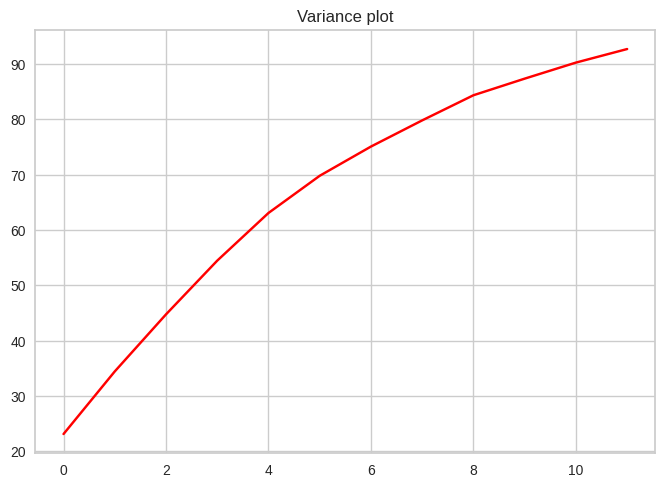

In [95]:
# Variance plot for PCA components obtained  
plt.plot(var_Cum,color="red")
plt.title('Variance plot')
plt.show()

In [96]:
#Used for evaluation
db = []
sil = []

K-Means method

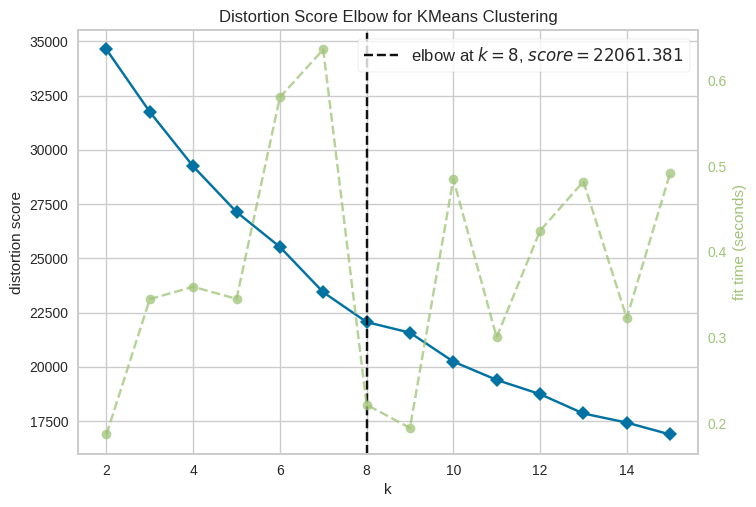

In [97]:
visualizer = KElbowVisualizer(KMeans(), k=15);
visualizer.fit(pca_values);
visualizer.show();

In [98]:
model_kmeans = KMeans(n_clusters=8, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(pca_values)

In [99]:
y_predict_kmeans

array([5, 2, 3, ..., 3, 5, 2], dtype=int32)

In [100]:
db.append(davies_bouldin_score(pca_values, model_kmeans.labels_))
sil.append(silhouette_score(pca_values, model_kmeans.labels_))

DBSCAN

In [101]:
dbscan = DBSCAN(eps=3, min_samples=3)
dbscan.fit_predict(pca_values)

array([0, 0, 0, ..., 0, 0, 0])

In [102]:
print(dbscan.labels_)

[0 0 0 ... 0 0 0]


In [103]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,1
4,0
...,...
2213,0
2214,0
2215,0
2216,0


In [104]:
df_dbscan = pd.concat([df,cl],axis=1)

In [105]:
df_dbscan["cluster"].value_counts()

 0.0    1864
 1.0     275
-1.0      25
 2.0      20
 7.0      11
 5.0       8
 3.0       7
 4.0       5
 6.0       3
Name: cluster, dtype: int64

Here data is been clustered into 8 clusters, and 25 records marked as noise.

In [106]:
db.append(davies_bouldin_score(pca_values, dbscan.labels_))
sil.append(silhouette_score(pca_values, dbscan.labels_))

Agglomerative clustering

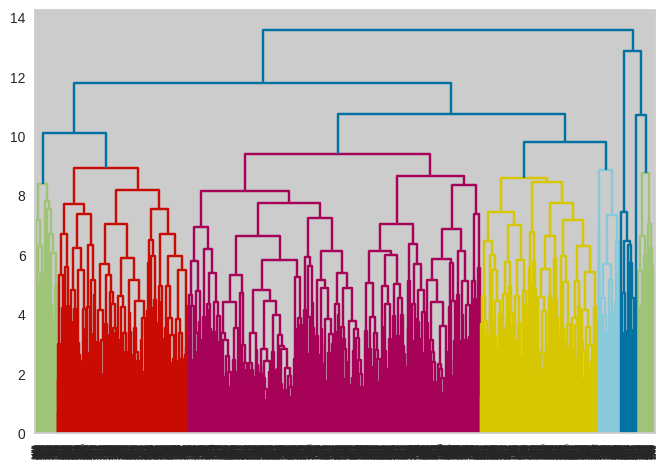

In [107]:
dendrogram = sch.dendrogram(sch.linkage(pca_values, method='complete'))

In [108]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [109]:
hc.fit(pca_values)

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=5)

In [110]:
y_hc = hc.fit_predict(pca_values)
y_hc

array([1, 4, 3, ..., 1, 1, 4])

In [111]:
df_agglo=df.copy()

In [112]:
df_agglo['h_clusterid'] = y_hc

In [113]:
df_agglo['h_clusterid'].value_counts()

4    1045
1     550
3     501
0      68
2      54
Name: h_clusterid, dtype: int64

In [114]:
db.append(davies_bouldin_score(pca_values, hc.labels_))
sil.append(silhouette_score(pca_values, hc.labels_))

Evaluation

In [115]:
res = pd.DataFrame({'Davies Bouldin Index (Lower is better)': db, 'Silhouette Index (Higher is better)': sil}, index=['KMeans', 'DBSCAN', 'Agglomerative'])
res.index.names = ['Algorithm']
res

,Davies Bouldin Index (Lower is better),Silhouette Index (Higher is better)
Algorithm,,
KMeans,1.671662,0.185817
DBSCAN,1.683019,0.133328
Agglomerative,2.072829,0.133888


By overall comparision of model with important features and model with all the features, former is yielding better results.

Here Agglomerative clusters has good Davies Bouldin Index but terrible Silhouette Index, Thus by comparision of both indexes, K-Means performs better hist_series